In [14]:
import random
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations, groupby

## Generating graph

In [15]:
# You can use this function to generate a random graph with 'num_of_nodes' nodes
# and 'completeness' probability of an edge between any two nodes
# If 'directed' is True, the graph will be directed
# If 'draw' is True, the graph will be drawn
def gnp_random_connected_graph(num_of_nodes: int,
                               completeness: int,
                               directed: bool = False,
                               draw: bool = False):
    """
    Generates a random graph, similarly to an Erdős-Rényi 
    graph, but enforcing that the resulting graph is conneted (in case of undirected graphs)
    """

    
    if directed:
        G = nx.DiGraph()
    else:
        G = nx.Graph()
    edges = combinations(range(num_of_nodes), 2)
    G.add_nodes_from(range(num_of_nodes))
    
    for _, node_edges in groupby(edges, key = lambda x: x[0]):
        node_edges = list(node_edges)
        random_edge = random.choice(node_edges)
        if random.random() < 0.5:
            random_edge = random_edge[::-1]
        G.add_edge(*random_edge)
        for e in node_edges:
            if random.random() < completeness:
                G.add_edge(*e)
                
    for (u,v,w) in G.edges(data=True):
        w['weight'] = random.randint(-5, 20)
                
    if draw: 
        plt.figure(figsize=(10,6))
        if directed:
            # draw with edge weights
            pos = nx.arf_layout(G)
            nx.draw(G,pos, node_color='lightblue', 
                    with_labels=True,
                    node_size=500, 
                    arrowsize=20, 
                    arrows=True)
            labels = nx.get_edge_attributes(G,'weight')
            nx.draw_networkx_edge_labels(G, pos,edge_labels=labels)
            
        else:
            nx.draw(G, node_color='lightblue', 
                with_labels=True, 
                node_size=500)
        
    return G

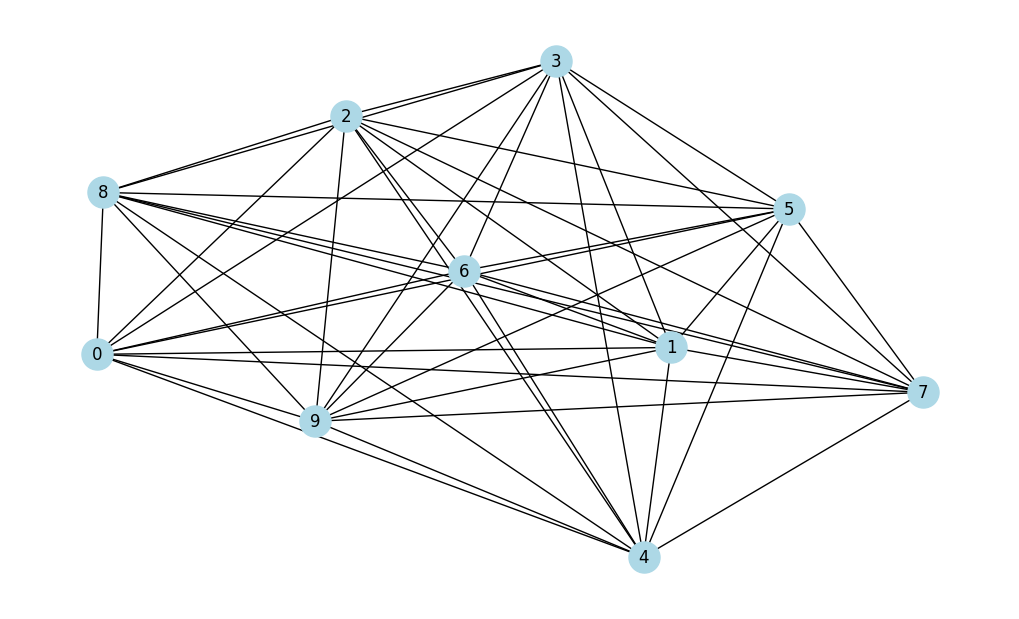

In [16]:
G = gnp_random_connected_graph(10, 1, False, True)

## Kruskal's algorithm

In [17]:
from networkx.algorithms import tree

In [18]:
mstk = tree.minimum_spanning_tree(G, algorithm="kruskal")

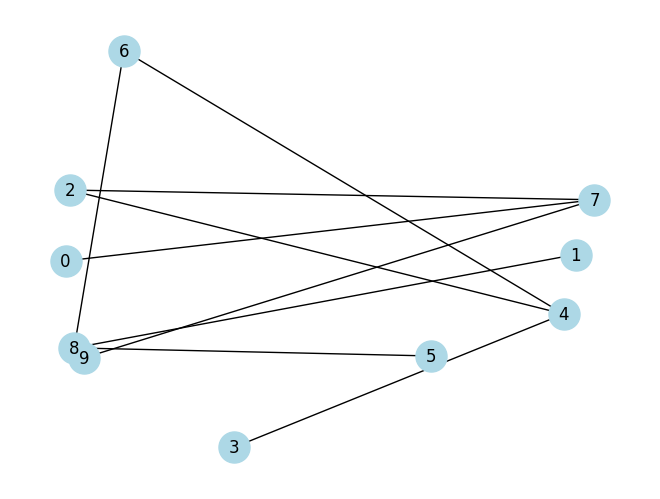

In [19]:
nx.draw(mstk, node_color='lightblue', 
        with_labels=True, 
        node_size=500)

In [20]:
def cycle(edge, vertice):
    if edge[vertice] == vertice:
        return vertice
    return cycle(edge, edge[vertice])

def union(edge, vertice_1, vertice_2):
    v1_root = cycle(edge, vertice_1)
    v2_root = cycle(edge, vertice_2)
    edge[v2_root] = v1_root

def kruskal(graph):
    
    edges = sorted(graph.edges(data=True), key=lambda x: x[2]['weight'])

    edges_dict = {vertice : vertice for vertice in graph.nodes()}

    res = []
    total_weight = 0

    for edge in edges:
        vertice_1, vertice_2, weight = edge
        v1_root = cycle(edges_dict, vertice_1)
        v2_root = cycle(edges_dict, vertice_2)

        if v1_root != v2_root:
            res.append(edge[:-1])
            total_weight += weight['weight']
            union(edges_dict, v1_root, v2_root)
    return res, total_weight
        
kruskal(G)

([(4, 6), (5, 8), (1, 8), (7, 9), (2, 4), (6, 8), (0, 7), (3, 4), (2, 7)], -26)

Алгоритм починається з сортування ребер графа за їх вагами.
Потім він проходить через відсортовані ребра, додаючи їх до каркасу, якщо вони не утворюють цикл.
Процес триває до тих пір, поки всі вершини не будуть включені до остовного дерева.
У цьому алгоритмі функції cycle та union виконують рекурсивну перевірку, чи не утворює ребро, яке ми додаємо, цикл, kruskal є головною змінною, яка циклічно будує каркас графа найменшої ваги.

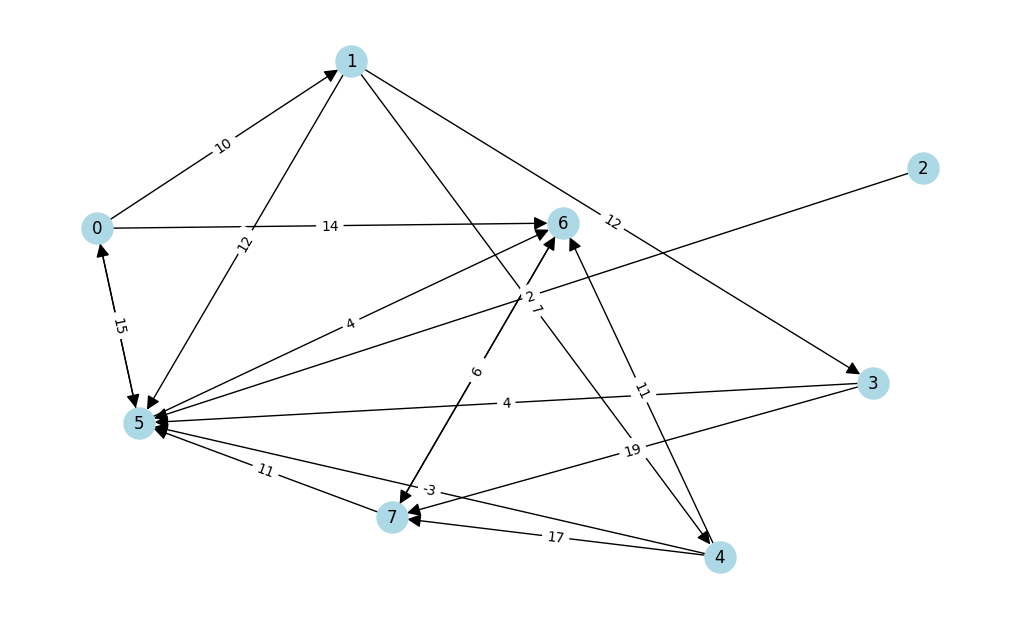

In [21]:
G = gnp_random_connected_graph(8, 0.5, True, True)

## Bellman-Ford algorithm

In [22]:
def graph_change_form(graph):
    return {(node_a, node_b) : weight['weight'] for node_a, node_b, weight in graph.edges(data = True)}

def build_matrix(graph, nodes_count):
    matrix = []
    for i in range(nodes_count):
        matrix.append([])
        for j in range(nodes_count):
            edge = (i, j)
            if edge in graph:
                matrix[-1].append(graph[edge])
            else:
                matrix[-1].append('∞')
    return matrix

def bellman_ford(graph):
    graph_dict = graph_change_form(G)
    nodes_count = len(graph.nodes())

    matrix = build_matrix(graph_dict, nodes_count)

    table = {0 : matrix[0]}

    for iteration in range(nodes_count - 2):
        y_idx = 0

        iter_lis = [a for a in table[iteration]]
        for path in table[iteration]:
            if isinstance(path, int):
                x_idx = 0
                for x in matrix[y_idx]:
                    if isinstance(x, int) and isinstance(table[iteration][x_idx], int):
                        if x + path < table[iteration][x_idx]:
                            iter_lis[x_idx] = x + path
                        else:
                            iter_lis[x_idx] = table[iteration][x_idx]
                    x_idx += 1
            y_idx += 1
        table[iteration+1] = iter_lis
    return table

print(bellman_ford(G))


{0: ['∞', 10, '∞', '∞', '∞', -5, 14, '∞'], 1: ['∞', 10, '∞', '∞', '∞', -5, -1, '∞'], 2: ['∞', 10, '∞', '∞', '∞', -5, -1, '∞'], 3: ['∞', 10, '∞', '∞', '∞', -5, -1, '∞'], 4: ['∞', 10, '∞', '∞', '∞', -5, -1, '∞'], 5: ['∞', 10, '∞', '∞', '∞', -5, -1, '∞'], 6: ['∞', 10, '∞', '∞', '∞', -5, -1, '∞']}


Алгоритм Беллмана-Форда використовується для знаходження найкоротших шляхів від одної вершини до всіх інших вершин у зваженому графі.
Алгоритм працює шляхом ітеративного обчислення довжин ребер графа та оновлення оцінок найкоротших шляхів до кінця всіх ітерацій.

## Example on time measuring

In [23]:
import time
from tqdm import tqdm

In [24]:
NUM_OF_ITERATIONS = 250
time_taken_kruskal = 0
time_taken_ford = 0
for i in tqdm(range(NUM_OF_ITERATIONS)):
    
    G = gnp_random_connected_graph(100, 0.4, False)

    start = time.time()
    bellman_ford(G)
    end = time.time()
    time_taken_ford += end - start

    start = time.time()
    kruskal(G)
    end = time.time()
    time_taken_kruskal += end - start

print(f'''Average time of Kruskals: {time_taken_kruskal/NUM_OF_ITERATIONS},
Average time of Bellman-Ford: {time_taken_ford/NUM_OF_ITERATIONS}''')

100%|██████████| 250/250 [00:24<00:00, 10.35it/s]

Average time of Kruskals: 0.012851288795471191,
Average time of Bellman-Ford: 0.07316044425964355


перевірка середнього часу виконань функцій, використовуючи модуль time